# Tracking the coronavirus in my neighborhood
### An analysis of neighborhoods in Orange County using data science methodologies


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install altair

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install folium

  Using cached requests-2.24.0-py2.py3-none-any.whl (61 kB)
  Using cached certifi-2020.6.20-py2.py3-none-any.whl (156 kB)
  Using cached chardet-3.0.4-py2.py3-none-any.whl (133 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Using cached urllib3-1.25.10-py2.py3-none-any.whl (127 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import altair as alt
import folium as folium

In [6]:
ca_covid = pd.read_csv("https://raw.githubusercontent.com/datadesk/california-coronavirus-data/master/latimes-place-totals.csv")
ca_covid.head()

date   county  fips            place  confirmed_cases note  \
0  2020-08-11  Alameda   1.0  Address unknown               86  NaN   
1  2020-08-11  Alameda   1.0          Alameda              209  NaN   
2  2020-08-11  Alameda   1.0           Albany               38  NaN   
3  2020-08-11  Alameda   1.0         Berkeley              432  NaN   
4  2020-08-11  Alameda   1.0    Castro Valley              364  NaN   

            x          y  
0         NaN        NaN  
1 -122.274444  37.756111  
2 -122.297778  37.886944  
3 -122.272778  37.871667  
4         NaN        NaN

In [7]:
# Unique County Names
county_name_list = ca_covid['county'].unique()
county_name_list = county_name_list.tolist()
county_name_list.insert(0, 'Select One')
print('Unique County Names: %d' % len(county_name_list))

Unique County Names: 44


In [8]:
county_name = 'Orange'
ca_county = ca_covid[ca_covid['county']== county_name]
ca_county = ca_county.sort_values('date', ascending = True)
ca_county.head()

date  county  fips        place  confirmed_cases note  \
100198  2020-03-27  Orange  59.0  Yorba Linda               10  NaN   
100170  2020-03-27  Orange  59.0  Aliso Viejo                2  NaN   
100171  2020-03-27  Orange  59.0      Anaheim               28  NaN   
100172  2020-03-27  Orange  59.0         Brea                1  NaN   
100173  2020-03-27  Orange  59.0   Buena Park                7  NaN   

                 x          y  
100198 -117.834681  33.890894  
100170 -117.726298  33.568460  
100171 -117.889722  33.836111  
100172 -117.900292  33.916475  
100173 -117.998139  33.867404

In [9]:
city_name = 'Irvine'
ca_city = ca_county[ca_county['place']== city_name]
ca_city = ca_city.sort_values('date', ascending = True)
ca_city.head()



date  county  fips   place  confirmed_cases note         x  \
100181  2020-03-27  Orange  59.0  Irvine               33  NaN -117.8436   
99877   2020-03-28  Orange  59.0  Irvine               36  NaN -117.8436   
99565   2020-03-29  Orange  59.0  Irvine               38  NaN -117.8436   
99215   2020-03-30  Orange  59.0  Irvine               43  NaN -117.8436   
98834   2020-03-31  Orange  59.0  Irvine               50  NaN -117.8436   

                y  
100181  33.686502  
99877   33.686502  
99565   33.686502  
99215   33.686502  
98834   33.686502

NameError: name 'df_county' is not defined

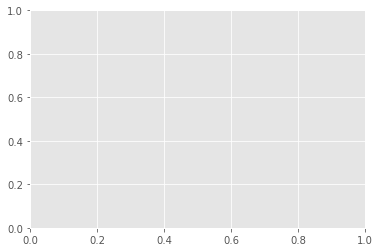

In [10]:
style.use('ggplot')
ax = plt.gca()
df_county.plot(kind='line',x='date',y='confirmed_cases', color='green', ax=ax, figsize=(20,10))
plt.title('Number of Cases In ' + county_name +' County')
plt.xlabel('date')
plt.ylabel('confirmed_cases')
plt.show()

Dropdown(description='county:', index=9, options=('Select One', 'Yolo', 'Alameda', 'Contra Costa', 'Imperial',…

c:\users\sunil\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


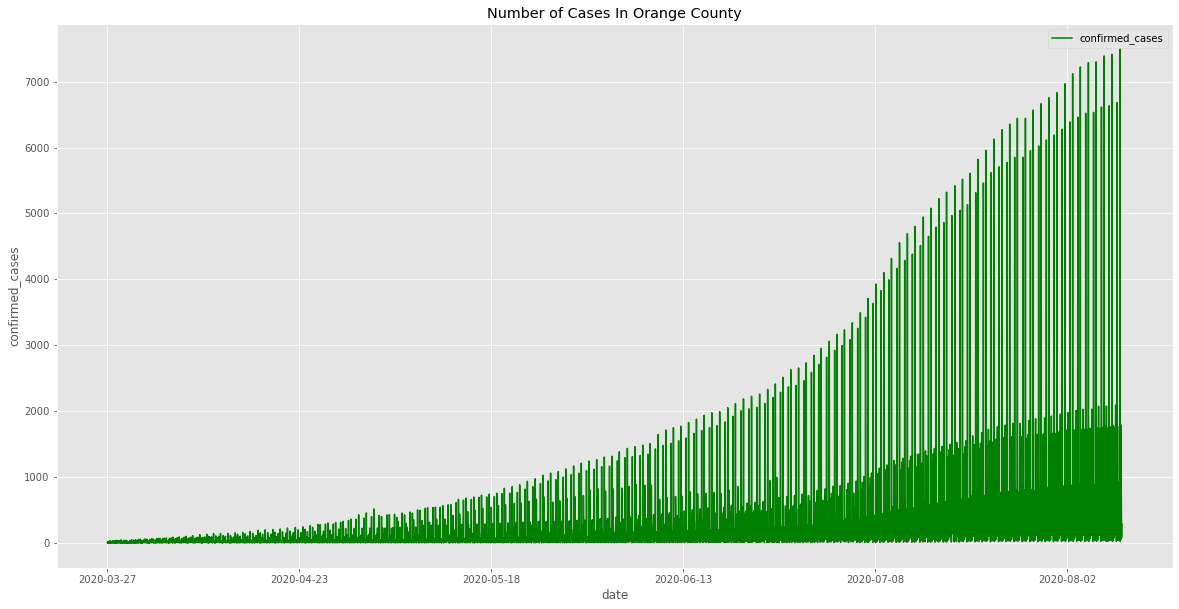

In [6]:
import ipywidgets as widgets
from IPython.display import clear_output

default_county = 'Orange'
country_widget = widgets.Dropdown(
    options= county_name_list,
    value= default_county,
    description='county:',
)

def refresh_chart(county_name):
    # reset plot and widget
    clear_output(wait=True)
    display(country_widget)
    if county_name != 'Select One':
        ca_counties = pd.read_csv("https://raw.githubusercontent.com/datadesk/california-coronavirus-data/master/latimes-place-totals.csv")
        ca_county = ca_counties[ca_counties['county'] == county_name]
        ca_county = ca_county.sort_values('date', ascending = True)
        style.use('ggplot')
        ax = plt.gca()
        ca_county.plot(kind='line',x='date',y='confirmed_cases', color='green', ax=ax, figsize=(20,10))
        plt.title('Number of Cases In ' + county_name +' County')
        plt.xlabel('date')
        plt.ylabel('confirmed_cases')
        plt.show()

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        refresh_chart(change['new'])
        
country_widget.observe(on_change)
display(country_widget)
refresh_chart(default_county)

In [11]:
ca_covid.head()

date   county  fips            place  confirmed_cases note  \
0  2020-08-11  Alameda   1.0  Address unknown               86  NaN   
1  2020-08-11  Alameda   1.0          Alameda              209  NaN   
2  2020-08-11  Alameda   1.0           Albany               38  NaN   
3  2020-08-11  Alameda   1.0         Berkeley              432  NaN   
4  2020-08-11  Alameda   1.0    Castro Valley              364  NaN   

            x          y  
0         NaN        NaN  
1 -122.274444  37.756111  
2 -122.297778  37.886944  
3 -122.272778  37.871667  
4         NaN        NaN

In [12]:
ca_latest_county = ca_covid[ca_covid['date'] == ca_covid['date'].max()]
del ca_latest_county['date']
del ca_latest_county['confirmed_cases']
ca_latest_county.head()

county  fips            place note           x          y
0  Alameda   1.0  Address unknown  NaN         NaN        NaN
1  Alameda   1.0          Alameda  NaN -122.274444  37.756111
2  Alameda   1.0           Albany  NaN -122.297778  37.886944
3  Alameda   1.0         Berkeley  NaN -122.272778  37.871667
4  Alameda   1.0    Castro Valley  NaN         NaN        NaN

In [13]:
ca_county.query("confirmed_cases == 'NaN'")

Empty DataFrame
Columns: [date, county, fips, place, confirmed_cases, note, x, y]
Index: []

In [14]:
ca_county.query("x == 'NaN'")

date  county  fips      place  confirmed_cases note   x   y
100196  2020-03-27  Orange  59.0    Unknown               34  NaN NaN NaN
100188  2020-03-27  Orange  59.0      Other               27  NaN NaN NaN
99893   2020-03-28  Orange  59.0    Unknown               46  NaN NaN NaN
99884   2020-03-28  Orange  59.0      Other               39  NaN NaN NaN
99581   2020-03-29  Orange  59.0    Unknown               50  NaN NaN NaN
...            ...     ...   ...        ...              ...  ...  ..  ..
2270    2020-08-09  Orange  59.0   Rossmoor               29  NaN NaN NaN
1491    2020-08-10  Orange  59.0  Silverado               42  NaN NaN NaN
1486    2020-08-10  Orange  59.0   Rossmoor               29  NaN NaN NaN
659     2020-08-11  Orange  59.0  Silverado               42  NaN NaN NaN
654     2020-08-11  Orange  59.0   Rossmoor               31  NaN NaN NaN

[191 rows x 8 columns]

In [15]:
ca_county.query("y == 'NaN'")

date  county  fips      place  confirmed_cases note   x   y
100196  2020-03-27  Orange  59.0    Unknown               34  NaN NaN NaN
100188  2020-03-27  Orange  59.0      Other               27  NaN NaN NaN
99893   2020-03-28  Orange  59.0    Unknown               46  NaN NaN NaN
99884   2020-03-28  Orange  59.0      Other               39  NaN NaN NaN
99581   2020-03-29  Orange  59.0    Unknown               50  NaN NaN NaN
...            ...     ...   ...        ...              ...  ...  ..  ..
2270    2020-08-09  Orange  59.0   Rossmoor               29  NaN NaN NaN
1491    2020-08-10  Orange  59.0  Silverado               42  NaN NaN NaN
1486    2020-08-10  Orange  59.0   Rossmoor               29  NaN NaN NaN
659     2020-08-11  Orange  59.0  Silverado               42  NaN NaN NaN
654     2020-08-11  Orange  59.0   Rossmoor               31  NaN NaN NaN

[191 rows x 8 columns]

In [16]:
ca_covid.query("x > 0")

date     county  fips     place  confirmed_cases note  \
3970   2020-08-07  San Mateo  81.0  Pacifica              126  NaN   
9731   2020-07-31  San Mateo  81.0  Pacifica              109  NaN   
15640  2020-07-24  San Mateo  81.0  Pacifica              100  NaN   
22535  2020-07-16  San Mateo  81.0  Pacifica               93  NaN   
27384  2020-07-10  San Mateo  81.0  Pacifica               81  NaN   
31936  2020-07-03  San Mateo  81.0  Pacifica               75  NaN   
38354  2020-06-25  San Mateo  81.0  Pacifica               59  NaN   
43127  2020-06-19  San Mateo  81.0  Pacifica               51  NaN   
48667  2020-06-12  San Mateo  81.0  Pacifica               47  NaN   
54171  2020-06-05  San Mateo  81.0  Pacifica               45  NaN   
55828  2020-06-03  San Mateo  81.0  Pacifica               43  NaN   
58098  2020-05-31  San Mateo  81.0  Pacifica               43  NaN   
59569  2020-05-29  San Mateo  81.0  Pacifica               43  NaN   
61207  2020-05-27  San Mateo  81.0  Pacifica               39  NaN   
64594  2020-05-22  San Mateo  81.0  Pacifica               39  NaN   
65430  2020-05-21  San Mateo  81.0  Pacifica               39  NaN   
70621  2020-05-14  San Mateo  81.0  Pacifica               38  NaN   
71453  2020-05-13  San Mateo  81.0  Pacifica               38  NaN   
73055  2020-05-11  San Mateo  81.0  Pacifica               38  NaN   
75349  2020-05-08  San Mateo  81.0  Pacifica               38  NaN   

                x          y  
3970   122.480689  37.610177  
9731   122.480689  37.610177  
15640  122.480689  37.610177  
22535  122.480689  37.610177  
27384  122.480689  37.610177  
31936  122.480689  37.610177  
38354  122.480689  37.610177  
43127  122.480689  37.610177  
48667  122.480689  37.610177  
54171  122.480689  37.610177  
55828  122.480689  37.610177  
58098  122.480689  37.610177  
59569  122.480689  37.610177  
61207  122.480689  37.610177  
64594  122.480689  37.610177  
65430  122.480689  37.610177  
70621  122.480689  37.610177  
71453  122.480689  37.610177  
73055  122.480689  37.610177  
75349  122.480689  37.610177

In [17]:
ca_county.query("date.isnull()", engine='python')

Empty DataFrame
Columns: [date, county, fips, place, confirmed_cases, note, x, y]
Index: []

In [18]:
ca_county = ca_county.query("confirmed_cases != 'NaN' & x < 0 & x != 'NaN' & date.notnull()", engine='python')
ca_county.head()

date  county  fips        place  confirmed_cases note  \
100198  2020-03-27  Orange  59.0  Yorba Linda               10  NaN   
100170  2020-03-27  Orange  59.0  Aliso Viejo                2  NaN   
100171  2020-03-27  Orange  59.0      Anaheim               28  NaN   
100172  2020-03-27  Orange  59.0         Brea                1  NaN   
100173  2020-03-27  Orange  59.0   Buena Park                7  NaN   

                 x          y  
100198 -117.834681  33.890894  
100170 -117.726298  33.568460  
100171 -117.889722  33.836111  
100172 -117.900292  33.916475  
100173 -117.998139  33.867404

In [19]:
ca_covid = ca_covid.query("confirmed_cases != 'NaN' & x < 0 & x != 'NaN' & date.notnull()", engine='python')
ca_covid.head()

date   county  fips       place  confirmed_cases note           x  \
1  2020-08-11  Alameda   1.0     Alameda              209  NaN -122.274444   
2  2020-08-11  Alameda   1.0      Albany               38  NaN -122.297778   
3  2020-08-11  Alameda   1.0    Berkeley              432  NaN -122.272778   
5  2020-08-11  Alameda   1.0      Dublin              159  NaN -121.935833   
6  2020-08-11  Alameda   1.0  Emeryville               53  NaN -122.285278   

           y  
1  37.756111  
2  37.886944  
3  37.871667  
5  37.702222  
6  37.831389

In [20]:
ca_city = ca_city.query("confirmed_cases != 'NaN' & x < 0 & x != 'NaN' & date.notnull()", engine='python')
ca_city.head()

date  county  fips   place  confirmed_cases note         x  \
100181  2020-03-27  Orange  59.0  Irvine               33  NaN -117.8436   
99877   2020-03-28  Orange  59.0  Irvine               36  NaN -117.8436   
99565   2020-03-29  Orange  59.0  Irvine               38  NaN -117.8436   
99215   2020-03-30  Orange  59.0  Irvine               43  NaN -117.8436   
98834   2020-03-31  Orange  59.0  Irvine               50  NaN -117.8436   

                y  
100181  33.686502  
99877   33.686502  
99565   33.686502  
99215   33.686502  
98834   33.686502

In [41]:
import requests as r 
import json
from IPython.display import HTML

ca_json = r.get('https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/ca_california_zip_codes_geo.min.json')
print(ca_json)

cali_map = folium.Map(location=[33.669445,-117.823059], zoom_start=12)
folium.Choropleth(geo_data=ca_json.json()['features'][512], 
                     fill_color='red',
                     fill_opacity=0.5,
                     line_opacity=0.8,
                     key_on='feature.properties.ZCTA5CE10').add_to(cali_map)

cali_map.save('plot_data_2.html')
HTML('<iframe src=plot_data_2.html width=800 height=500></iframe>')

<Response [200]>


In [21]:
ca_city.head()

date  county  fips   place  confirmed_cases note         x  \
100181  2020-03-27  Orange  59.0  Irvine               33  NaN -117.8436   
99877   2020-03-28  Orange  59.0  Irvine               36  NaN -117.8436   
99565   2020-03-29  Orange  59.0  Irvine               38  NaN -117.8436   
99215   2020-03-30  Orange  59.0  Irvine               43  NaN -117.8436   
98834   2020-03-31  Orange  59.0  Irvine               50  NaN -117.8436   

                y  
100181  33.686502  
99877   33.686502  
99565   33.686502  
99215   33.686502  
98834   33.686502

In [22]:
ca_city.shape

(137, 8)

In [23]:
ca_city = ca_city.sort_values(by=["date"], ascending=True)
ca_city.tail()

date  county  fips   place  confirmed_cases note         x  \
3775  2020-08-07  Orange  59.0  Irvine             1215  NaN -117.8436   
2946  2020-08-08  Orange  59.0  Irvine             1225  NaN -117.8436   
2253  2020-08-09  Orange  59.0  Irvine             1240  NaN -117.8436   
1469  2020-08-10  Orange  59.0  Irvine             1254  NaN -117.8436   
637   2020-08-11  Orange  59.0  Irvine             1274  NaN -117.8436   

              y  
3775  33.686502  
2946  33.686502  
2253  33.686502  
1469  33.686502  
637   33.686502

In [24]:
ca_city.iloc[0]['date']

'2020-03-27'

In [25]:
lastdate = ca_city.iloc[-1]['date']
lastdate

'2020-08-11'

In [30]:
irvine_single_day = ca_city.query('date==@lastdate')
irvine_single_day = irvine_single_day.sort_values(by=["confirmed_cases"], ascending=True)
irvine_single_day

date  county  fips   place  confirmed_cases note         x  \
637  2020-08-11  Orange  59.0  Irvine             1274  NaN -117.8436   

             y  
637  33.686502

In [27]:
orange_single_day = ca_county.query('date==@lastdate')
orange_single_day = orange_single_day.sort_values(by=["confirmed_cases"], ascending=True)
orange_single_day.head()

date  county  fips                 place  confirmed_cases note  \
630  2020-08-11  Orange  59.0          Coto de Caza               30  NaN   
663  2020-08-11  Orange  59.0            Villa Park               42  NaN   
644  2020-08-11  Orange  59.0          Laguna Woods               45  NaN   
652  2020-08-11  Orange  59.0  Rancho Mission Viejo               47  NaN   
647  2020-08-11  Orange  59.0           Midway City               92  NaN   

              x          y  
630 -117.587778  33.595833  
663 -117.822072  33.814006  
644 -117.725116  33.610170  
652 -117.610000  33.600000  
647 -117.987000  33.744700

In [31]:
ca_single_day = ca_covid.query('date==@lastdate')
ca_single_day

date   county   fips                    place  confirmed_cases  \
1     2020-08-11  Alameda    1.0                  Alameda              209   
2     2020-08-11  Alameda    1.0                   Albany               38   
3     2020-08-11  Alameda    1.0                 Berkeley              432   
5     2020-08-11  Alameda    1.0                   Dublin              159   
6     2020-08-11  Alameda    1.0               Emeryville               53   
...          ...      ...    ...                      ...              ...   
998   2020-08-11     Yolo  113.0                  Winters               78   
999   2020-08-11     Yolo  113.0                 Woodland              830   
1000  2020-08-11     Yuba  115.0               Marysville              312   
1001  2020-08-11     Yuba  115.0         Olivehurst/Linda              245   
1003  2020-08-11     Yuba  115.0  Plumas Lake & Wheatland               75   

     note           x          y  
1     NaN -122.274444  37.756111  
2     NaN -122.297778  37.886944  
3     NaN -122.272778  37.871667  
5     NaN -121.935833  37.702222  
6     NaN -122.285278  37.831389  
...   ...         ...        ...  
998   NaN -121.970833  38.525000  
999   NaN -121.773333  38.678611  
1000  NaN -121.583333  39.150000  
1001  NaN -121.550833  39.127778  
1003  NaN -121.558056  39.020833  

[924 rows x 8 columns]

In [32]:
ca_single_day = ca_single_day.query("confirmed_cases != 'NaN' & x < 0 & x != 'NaN' & date.notnull()", engine='python')
ca_single_day.head()

date   county  fips       place  confirmed_cases note           x  \
1  2020-08-11  Alameda   1.0     Alameda              209  NaN -122.274444   
2  2020-08-11  Alameda   1.0      Albany               38  NaN -122.297778   
3  2020-08-11  Alameda   1.0    Berkeley              432  NaN -122.272778   
5  2020-08-11  Alameda   1.0      Dublin              159  NaN -121.935833   
6  2020-08-11  Alameda   1.0  Emeryville               53  NaN -122.285278   

           y  
1  37.756111  
2  37.886944  
3  37.871667  
5  37.702222  
6  37.831389

In [33]:
ca_city = ca_city.query("place=='Irvine'")
ca_city

date  county  fips   place  confirmed_cases note         x  \
100181  2020-03-27  Orange  59.0  Irvine               33  NaN -117.8436   
99877   2020-03-28  Orange  59.0  Irvine               36  NaN -117.8436   
99565   2020-03-29  Orange  59.0  Irvine               38  NaN -117.8436   
99215   2020-03-30  Orange  59.0  Irvine               43  NaN -117.8436   
98834   2020-03-31  Orange  59.0  Irvine               50  NaN -117.8436   
...            ...     ...   ...     ...              ...  ...       ...   
3775    2020-08-07  Orange  59.0  Irvine             1215  NaN -117.8436   
2946    2020-08-08  Orange  59.0  Irvine             1225  NaN -117.8436   
2253    2020-08-09  Orange  59.0  Irvine             1240  NaN -117.8436   
1469    2020-08-10  Orange  59.0  Irvine             1254  NaN -117.8436   
637     2020-08-11  Orange  59.0  Irvine             1274  NaN -117.8436   

                y  
100181  33.686502  
99877   33.686502  
99565   33.686502  
99215   33.686502  
98834   33.686502  
...           ...  
3775    33.686502  
2946    33.686502  
2253    33.686502  
1469    33.686502  
637     33.686502  

[137 rows x 8 columns]

In [34]:
ca_covid.confirmed_cases.describe()

count    97788.000000
mean       214.692519
std        540.082760
min          1.000000
25%         11.000000
50%         48.000000
75%        180.000000
max      14415.000000
Name: confirmed_cases, dtype: float64

In [35]:
ca_covid.groupby("county").confirmed_cases.describe()

count        mean          std   min     25%    50%  \
county                                                                   
Alameda           1841.0  266.177078   610.556529   1.0   28.00   68.0   
Amador             380.0    7.473684    12.151065   1.0    1.00    4.0   
Butte              233.0   90.952790   129.824658   3.0   13.00   28.0   
Calaveras          120.0   11.825000    12.329961   1.0    3.00    5.0   
Contra Costa      3328.0  111.404147   214.367733   1.0   18.00   44.0   
El Dorado          636.0   28.218553    54.067013   1.0    4.00    9.0   
Fresno            1514.0  173.996697   609.034138   1.0   15.00   41.0   
Humboldt            87.0   50.701149    56.194661   3.0    8.00   27.0   
Imperial          1141.0  291.491674   568.558416   1.0    9.00   56.0   
Kern              3549.0  181.492251   363.809904   1.0    4.00   40.0   
Kings              376.0  217.648936   230.440909   1.0   41.75  138.0   
Long Beach         968.0  329.537190   342.526643  14.0  108.00  213.0   
Los Angeles      42442.0  234.668065   488.252262   1.0   12.00   57.0   
Madera              64.0  414.015625   344.842430  58.0  115.00  267.5   
Marin             2044.0   60.608611   242.347411   1.0    1.00   10.0   
Mendocino          284.0   33.859155    61.872957   1.0    3.00    9.0   
Merced             659.0  134.195751   250.287967   6.0   13.00   42.0   
Mono               177.0   27.389831    35.960687   1.0    2.00   12.0   
Monterey           424.0  449.377358   647.891433   8.0   55.00  208.5   
Napa              1031.0   28.383123    76.418557   1.0    2.00    4.0   
Nevada             373.0   21.420912    32.167527   1.0    1.00   12.0   
Orange            5219.0  297.549147   770.900228   1.0   25.00   70.0   
Placer             318.0  248.386792   414.468507  11.0   25.00   88.5   
Plumas              58.0    5.965517     5.109213   1.0    1.00    4.5   
Riverside         6606.0  189.335301   472.405938   1.0   10.00   38.0   
Sacramento         839.0  422.506555  1071.500489   1.0   26.00   99.0   
San Bernardino    4652.0  282.588779   638.587830   1.0    8.00   41.0   
San Diego         5035.0  260.156504  1038.772599   1.0    6.00   27.0   
San Francisco     2659.0  124.650621   178.036347   1.0   27.00   60.0   
San Joaquin        420.0  283.216667   735.896835   1.0   32.00   70.0   
San Luis Obispo   1136.0   49.548415    76.841787   5.0    9.00   19.0   
San Mateo          620.0   87.132258   179.894086   1.0    1.00   13.0   
Santa Barbara     1193.0  192.270746   423.450142   1.0   15.00   45.0   
Santa Clara       1719.0  278.175684   861.836637   1.0   24.00   63.0   
Santa Cruz         357.0   85.182073   122.494888   5.0   15.00   42.0   
Solano             598.0  184.742475   299.201473   1.0   19.25   52.5   
Sonoma             491.0  175.639511   285.924134  13.0   22.50   62.0   
Stanislaus        1043.0  177.315436   403.901847   1.0   12.00   45.0   
Sutter              38.0  336.815789   264.623226  68.0   88.00  262.0   
Tulare             858.0  182.351981   305.845073   1.0   13.00   62.5   
Ventura           1775.0  125.690704   205.686130   1.0    7.00   40.0   
Yolo               417.0  143.342926   177.424035   4.0   36.00   76.0   
Yuba                66.0  144.075758    80.047738  34.0   63.50  146.5   

                    75%      max  
county                            
Alameda          214.00   5245.0  
Amador             8.00     95.0  
Butte            115.00    568.0  
Calaveras         16.00     54.0  
Contra Costa      96.00   2033.0  
El Dorado         24.00    374.0  
Fresno           125.00   9051.0  
Humboldt          84.00    218.0  
Imperial         267.00   3035.0  
Kern             180.00   3617.0  
Kings            310.00   1321.0  
Long Beach       426.00   2110.0  
Los Angeles      224.00   9210.0  
Madera           657.25   1247.0  
Marin             30.00   2232.0  
Mendocino         36.00    351.0  
Merced           131.00   2204.0  
Mono              35.00

In [36]:
ca_covid.groupby("county").confirmed_cases.describe().sort_values(by=["max"], ascending=False)

count        mean          std   min     25%    50%  \
county                                                                   
San Diego         5035.0  260.156504  1038.772599   1.0    6.00   27.0   
Los Angeles      42442.0  234.668065   488.252262   1.0   12.00   57.0   
Fresno            1514.0  173.996697   609.034138   1.0   15.00   41.0   
Santa Clara       1719.0  278.175684   861.836637   1.0   24.00   63.0   
Orange            5219.0  297.549147   770.900228   1.0   25.00   70.0   
Sacramento         839.0  422.506555  1071.500489   1.0   26.00   99.0   
Riverside         6606.0  189.335301   472.405938   1.0   10.00   38.0   
San Joaquin        420.0  283.216667   735.896835   1.0   32.00   70.0   
San Bernardino    4652.0  282.588779   638.587830   1.0    8.00   41.0   
Alameda           1841.0  266.177078   610.556529   1.0   28.00   68.0   
Kern              3549.0  181.492251   363.809904   1.0    4.00   40.0   
Stanislaus        1043.0  177.315436   403.901847   1.0   12.00   45.0   
Santa Barbara     1193.0  192.270746   423.450142   1.0   15.00   45.0   
Monterey           424.0  449.377358   647.891433   8.0   55.00  208.5   
Imperial          1141.0  291.491674   568.558416   1.0    9.00   56.0   
Marin             2044.0   60.608611   242.347411   1.0    1.00   10.0   
Merced             659.0  134.195751   250.287967   6.0   13.00   42.0   
Long Beach         968.0  329.537190   342.526643  14.0  108.00  213.0   
Contra Costa      3328.0  111.404147   214.367733   1.0   18.00   44.0   
Placer             318.0  248.386792   414.468507  11.0   25.00   88.5   
Tulare             858.0  182.351981   305.845073   1.0   13.00   62.5   
Sonoma             491.0  175.639511   285.924134  13.0   22.50   62.0   
Ventura           1775.0  125.690704   205.686130   1.0    7.00   40.0   
Solano             598.0  184.742475   299.201473   1.0   19.25   52.5   
Kings              376.0  217.648936   230.440909   1.0   41.75  138.0   
Madera              64.0  414.015625   344.842430  58.0  115.00  267.5   
San Mateo          620.0   87.132258   179.894086   1.0    1.00   13.0   
San Francisco     2659.0  124.650621   178.036347   1.0   27.00   60.0   
Yolo               417.0  143.342926   177.424035   4.0   36.00   76.0   
Sutter              38.0  336.815789   264.623226  68.0   88.00  262.0   
Napa              1031.0   28.383123    76.418557   1.0    2.00    4.0   
Santa Cruz         357.0   85.182073   122.494888   5.0   15.00   42.0   
San Luis Obispo   1136.0   49.548415    76.841787   5.0    9.00   19.0   
Butte              233.0   90.952790   129.824658   3.0   13.00   28.0   
El Dorado          636.0   28.218553    54.067013   1.0    4.00    9.0   
Mendocino          284.0   33.859155    61.872957   1.0    3.00    9.0   
Yuba                66.0  144.075758    80.047738  34.0   63.50  146.5   
Humboldt            87.0   50.701149    56.194661   3.0    8.00   27.0   
Nevada             373.0   21.420912    32.167527   1.0    1.00   12.0   
Mono               177.0   27.389831    35.960687   1.0    2.00   12.0   
Amador             380.0    7.473684    12.151065   1.0    1.00    4.0   
Calaveras          120.0   11.825000    12.329961   1.0    3.00    5.0   
Plumas              58.0    5.965517     5.109213   1.0    1.00    4.5   

                    75%      max  
county                            
San Diego        124.00  14415.0  
Los Angeles      224.00   9210.0  
Fresno           125.00   9051.0  
Santa Clara      138.00   8571.0  
Orange           231.00   8062.0  
Sacramento       324.00   7620.0  
Riverside        146.00   6103.0  
San Joaquin      233.00   5847.0  
San Bernardino   230.00   5833.0  
Alameda          214.00   5245.0  
Kern             180.00   3617.0  
Stanislaus       154.00   3297.0  
Santa Barbara    124.00   3176.0  
Monterey         454.50   3147.0  
Imperial         267.00   3035.0  
Marin             30.00   2232.0  
Merced           131.00   2204.0  
Long Beach       426.00

In [35]:
ca_county.groupby("place").confirmed_cases.describe().sort_values(by=["max"], ascending=False).head(50)

count         mean          std    min     25%  \
place                                                                    
Santa Ana               134.0  2233.000000  2345.613375   13.0  339.00   
Anaheim                 134.0  2035.582090  2116.337844   28.0  323.50   
Garden Grove            134.0   623.149254   650.897894    4.0  101.50   
Orange                  134.0   535.500000   565.014508   11.0   86.00   
Fullerton               134.0   505.462687   575.581637    7.0   75.25   
Huntington Beach        134.0   589.477612   551.300605   26.0  216.25   
Costa Mesa              134.0   331.283582   409.353619    8.0   38.50   
Irvine                  134.0   387.619403   379.607411   33.0  127.75   
Buena Park              134.0   336.298507   334.214443    7.0   77.25   
Other/unknown            69.0   453.043478   307.945251   52.0   87.00   
La Habra                134.0   256.940299   291.738805    1.0   47.25   
Tustin                  134.0   249.813433   288.630866    4.0   39.00   
Newport Beach           134.0   286.656716   270.429986   32.0   97.00   
Other*                    2.0   832.000000    41.012193  803.0  817.50   
Westminster             134.0   222.925373   224.220475    5.0   40.75   
Placentia               134.0   216.194030   217.715151    5.0   53.00   
Lake Forest             134.0   165.731343   200.348687    5.0   28.25   
Mission Viejo           134.0   174.656716   193.070641    6.0   42.50   
Unknown                   8.0   237.250000   265.434818   34.0   45.50   
Yorba Linda             133.0   161.345865   159.246761   10.0   49.00   
Stanton                 133.0   137.428571   145.968048    1.0   27.00   
Cypress                 134.0   126.283582   122.733565    6.0   42.00   
Other                     9.0   148.333333   184.482384   15.0   16.00   
Fountain Valley         134.0   115.828358   118.567105    5.0   31.25   
Brea                    134.0    99.634328   115.454808    1.0   20.00   
San Clemente            134.0   112.365672    98.893391   10.0   45.50   
Laguna Niguel           134.0    89.500000    91.345724   11.0   32.00   
San Juan Capistrano     134.0    87.917910    82.925190    9.0   24.75   
Aliso Viejo             133.0    80.744361    93.361358    2.0   18.00   
Rancho Santa Margarita  134.0    69.231343    83.832084    3.0   14.00   
Laguna Hills            131.0    71.320611    72.561196    1.0   22.00   
Seal Beach              134.0    69.343284    73.184914    1.0   11.00   
Dana Point              134.0    58.335821    58.931073    6.0   22.00   
Los Alamitos            119.0    81.747899    47.070488    1.0   41.00   
Trabuco Canyon          126.0    45.119048    51.672911    5.0   11.00   
Laguna Beach            131.0    61.923664    33.836625   22.0   37.00   
La Palma                131.0    41.076336    37.851454    6.0   14.00   
Ladera Ranch            128.0    37.554688    39.021054    6.0   12.00   
Midway City             104.0    32.413462    22.871787    5.0   12.00   
Other/Unknown            10.0    63.500000     5.254628   55.0   60.00   
Rancho Mission Viejo    115.0    18.469565    15.672818    5.0    6.00   
Laguna Woods            125.0    16.848000    12.125058    1.0    8.00   
Villa Park              124.0    16.008065    13.596685    1.0    6.00   
Silverado                34.0    29.352941    12.254578    8.0   16.00   
Rossmoor                 53.0    22.773585     6.018055   12.0   18.00   
Coto de Caza            118.0    10.135593     7.013924    5.0    5.00   
Corona Del Mar            1.0    12.000000          NaN   12.0   12.00   

                           50%      75%     max  
place                                            
Santa Ana               1286.5  3456.75  7496.0  
Anaheim                 1140.0  3215.25  6682.0  
Garden Grove             361.5   933.75  2094.0  
Orange                   288.5   807.00  1793.0  
Fullerton                219.5   765.75  1771.0  
Huntington Beach         350.5   857.75  1753.0

In [37]:
!pip install plotly

In [38]:
import plotly.express as px
Irvine = ca_covid.query("place == ['Irvine']")
px.bar(Irvine,
      x='date',
      y='confirmed_cases')

In [39]:
OC_Cities = ca_county.query("place == ['Santa Ana','Anaheim','Irvine']")
px.bar(OC_Cities,
      x='date',
      y='confirmed_cases',
      color = 'place')

In [40]:
px.scatter(orange_single_day,
           x='x',
           y='y',
           hover_name='place',
           color='confirmed_cases')

In [41]:
px.scatter(ca_single_day,
           x='x',
           y='y',
           hover_name='place',
           color='confirmed_cases')

In [42]:
px.scatter(ca_single_day,
           x='x',
           y='y',
           color='confirmed_cases', 
           size='confirmed_cases',
           size_max=40, 
           hover_name='place',
           title = 'Confirmed Cases for ' + lastdate)

In [43]:
px.scatter(ca_single_day,
           x='x',
           y='y',
           color='confirmed_cases', 
           size='confirmed_cases',
           size_max=40, 
           hover_name='place',
           color_continuous_scale = 'RdYlGn_r') # added _r to reverse color scheme

In [44]:
ca_single_day_mean = ca_single_day.confirmed_cases.mean()
ca_single_day_mean

585.3290043290043

In [45]:
px.scatter(ca_single_day,
           x='x',
           y='y',
           color='confirmed_cases', 
           size='confirmed_cases',
           size_max=40, 
           hover_name='place',
           color_continuous_scale = 'RdYlGn_r', # added _r to reverse color scheme
           range_color = (0,ca_single_day_mean * 2) # double the mean
          )

In [46]:
orange_mean = ca_county.confirmed_cases.mean()
orange_mean

297.5491473462349

In [47]:
px.scatter(ca_county,
           x='x',
           y='y',
           color='confirmed_cases', 
           size='confirmed_cases',
           size_max=40, 
           hover_name='place',
           animation_frame='date', # this creates a frame by frame animation by day
           color_continuous_scale = 'RdYlGn_r',
           range_color = (0,orange_mean*2))

In [48]:
fig = px.scatter_geo(ca_single_day,
           lon='x',
           lat='y',
           color='confirmed_cases', 
           size='confirmed_cases',
           size_max=40, 
           hover_name='place',
           scope='usa',
           color_continuous_scale = 'RdYlGn_r',
           range_color = (0,ca_single_day_mean * 2) # double the mean 
            )

fig.update_geos(fitbounds="locations") 

In [49]:
fig = px.scatter_geo(ca_county,
           lon='x',
           lat='y',
           color='confirmed_cases', 
           size='confirmed_cases',
           size_max=40, 
           hover_name='place',
           scope='usa',                     
           animation_frame='date',
           color_continuous_scale = 'RdYlGn_r',
           range_color = (0,orange_mean*2))

fig.update_geos(fitbounds="locations") 

In [71]:
# Set the map up
map_orange = folium.Map(location=[33.6846, -117.8265],
                        tiles = "Stamen Toner",
                        zoom_start = 9)
# Simple marker
folium.Marker([33.6846, -117.8265],
              popup='Irvine',
              icon=folium.Icon(color='green')
             ).add_to(map_orange)

# Circle marker
folium.CircleMarker([33.6846, -117.8265],
                    radius=30,
                    popup='Irvine',
                    color='red',
                    ).add_to(map_orange)

# Interactive marker
map_orange.add_child(folium.ClickForMarker(popup="Irvine"))

map_orange


In [50]:
locations = ca_county[['x', 'y']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

[-117.698912, 33.467458]

In [51]:
# Create a Map instance
map = folium.Map(location=[34,-118], 
               zoom_start=8, 
               control_scale=True
                )

map

In [52]:
# Create a Map instance with different basemap
map = folium.Map(location=[34,-118], 
               zoom_start=8, 
               control_scale=True,
               tiles='CartoDB dark_matter',
               attr= '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors &copy; <a href="https://carto.com/attributions">CARTO</a>')
map

In [53]:
# add a circle
my_circle = folium.Circle(
    radius=10000, # this is in meters
    location=[34,-118],
    color='crimson',
    fill=True,
)
my_circle.add_to(map)
map

<AxesSubplot:xlabel='x', ylabel='y'>

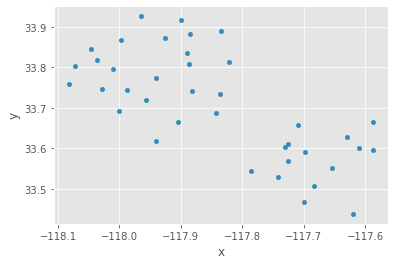

In [54]:
orange_single_day.plot(x ='x', y='y', kind = 'scatter')

In [55]:
orange_single_day = orange_single_day.query("confirmed_cases != 'NaN' & x < 0 & x != 'NaN' & date.notnull()", engine='python')
orange_single_day.head()

date  county  fips                 place  confirmed_cases note  \
630  2020-08-11  Orange  59.0          Coto de Caza               30  NaN   
663  2020-08-11  Orange  59.0            Villa Park               42  NaN   
644  2020-08-11  Orange  59.0          Laguna Woods               45  NaN   
652  2020-08-11  Orange  59.0  Rancho Mission Viejo               47  NaN   
647  2020-08-11  Orange  59.0           Midway City               92  NaN   

              x          y  
630 -117.587778  33.595833  
663 -117.822072  33.814006  
644 -117.725116  33.610170  
652 -117.610000  33.600000  
647 -117.987000  33.744700

In [99]:
# loop through the rows in Los Angeles, and create a circle based on confirmed cases
for index, row in orange_single_day.iterrows():
    # set up the variables
    lat = row['y']
    lon = row['x']
    label = str(row['confirmed_cases']) + ' confirmed cases in ' + row['place']
    size = row['confirmed_cases']
    
    # create a circle for every row
    circle = folium.Circle(
        radius=size,
        location=[lat,lon],
        tooltip = label,
        color='crimson',
        fill = True
    )
    circle.add_to(map)
# show the map
map

In [56]:
import altair as alt

In [57]:
# reset the map (only way to get rid of circles)
map = folium.Map(location=[34,-118], 
                zoom_start=8, 
                control_scale=True,
                tiles='CartoDB dark_matter',
                attr= '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors &copy; <a href="https://carto.com/attributions">CARTO</a>')

In [58]:
# create a function to create circles, and also add a chart in the popup window (a lot here, will break it up later)
def createCircle(lat,lon,size,place,label):
    # create a bar chart for each circle
    bar = alt.Chart(ca_county.query('place == @place')).mark_bar().encode(
        x=alt.X('date', axis=alt.Axis(labels=False)), # turn the labels off because there are too many
        y='confirmed_cases',
        color='confirmed_cases',
        tooltip = ['date','place','confirmed_cases']
    ).properties(width=400,height=200)

    # add the bar chart as a folium feature
    vega = folium.features.VegaLite(
        bar,
        width=600,
        height=200,
    )

    # create the circle
    circle = folium.Circle(
        radius=size,
        location=[lat,lon],
        tooltip = label,
        color='crimson',
        fill = True
    )

    # create a popup
    popup = folium.Popup()

    # add the chart to the popup
    vega.add_to(popup)
    
    # add the popup to the circle
    popup.add_to(circle)
    
    # add the circle to the map
    circle.add_to(map)
    

In [59]:
# loop through the rows in Los Angeles, and create a circle based on confirmed cases
for index, row in orange_single_day.iterrows():
    label = str(row['confirmed_cases']) + ' confirmed cases in ' + row['place']
    createCircle(row['y'],row['x'],row['confirmed_cases'],row['place'],label)

In [60]:
# show the map
map

In [61]:
# save it!
map.save('index.html')

In [62]:
orange_single_day.head()

date  county  fips                 place  confirmed_cases note  \
630  2020-08-11  Orange  59.0          Coto de Caza               30  NaN   
663  2020-08-11  Orange  59.0            Villa Park               42  NaN   
644  2020-08-11  Orange  59.0          Laguna Woods               45  NaN   
652  2020-08-11  Orange  59.0  Rancho Mission Viejo               47  NaN   
647  2020-08-11  Orange  59.0           Midway City               92  NaN   

              x          y  
630 -117.587778  33.595833  
663 -117.822072  33.814006  
644 -117.725116  33.610170  
652 -117.610000  33.600000  
647 -117.987000  33.744700

In [63]:
orange_single_day.tail()

date  county  fips         place  confirmed_cases note           x  \
634  2020-08-11  Orange  59.0     Fullerton             1871  NaN -117.925205   
650  2020-08-11  Orange  59.0        Orange             1896  NaN -117.887465   
635  2020-08-11  Orange  59.0  Garden Grove             2261  NaN -117.940639   
626  2020-08-11  Orange  59.0       Anaheim             7093  NaN -117.889722   
657  2020-08-11  Orange  59.0     Santa Ana             8062  NaN -117.881389   

             y  
634  33.871972  
650  33.807614  
635  33.773220  
626  33.836111  
657  33.740833

c:\users\sunil\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning:

FixedFormatter should only be used together with FixedLocator



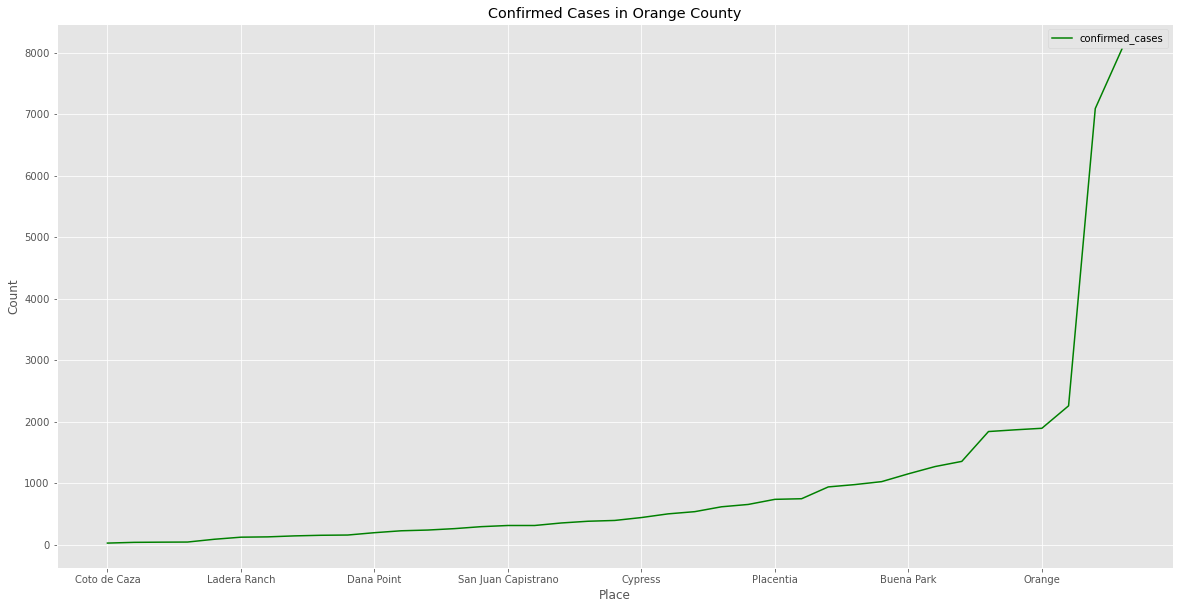

In [64]:
style.use('ggplot')
ax = plt.gca()
orange_single_day.plot(kind='line',x='place',y='confirmed_cases', color='green', ax=ax, figsize=(20,10))

plt.title('Confirmed Cases in Orange County')
plt.xlabel('Place')
plt.ylabel('Count')
plt.show()

In [66]:
ca_county = ca_county.query("confirmed_cases != 'NaN' & x < 0 & x != 'NaN' & date.notnull()", engine='python')
ca_county.head()

date  county  fips        place  confirmed_cases note  \
100198  2020-03-27  Orange  59.0  Yorba Linda               10  NaN   
100170  2020-03-27  Orange  59.0  Aliso Viejo                2  NaN   
100171  2020-03-27  Orange  59.0      Anaheim               28  NaN   
100172  2020-03-27  Orange  59.0         Brea                1  NaN   
100173  2020-03-27  Orange  59.0   Buena Park                7  NaN   

                 x          y  
100198 -117.834681  33.890894  
100170 -117.726298  33.568460  
100171 -117.889722  33.836111  
100172 -117.900292  33.916475  
100173 -117.998139  33.867404